In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('training.csv')

In [5]:
data.shape

(5660, 14)

In [7]:
data.head()

,StoreNumber,dayOfTheYear,3HourBucket,GrossSoldQuantity,Cash/Credit Site,EBT Site,Loyalty Site,ExtraMile Site,CoBrand,Alcohol,Carwash,Food Service,City,State
0,1000,1,1,3,False,True,True,True,No,True,False,True,HOUSTON,TX
1,1000,1,2,5,False,True,True,True,No,True,False,True,HOUSTON,TX
2,1000,1,3,6,False,True,True,True,No,True,False,True,HOUSTON,TX
3,1000,1,4,3,False,True,True,True,No,True,False,True,HOUSTON,TX
4,1000,2,1,13,False,True,True,True,No,True,False,True,HOUSTON,TX


In [6]:
data = data.filter(items = ['StoreNumber','dayOfTheYear','3HourBucket','GrossSoldQuantity'])

In [7]:
data.head()

,StoreNumber,dayOfTheYear,3HourBucket,GrossSoldQuantity
0,1000,1,1,3
1,1000,1,2,5
2,1000,1,3,6
3,1000,1,4,3
4,1000,2,1,13


In [8]:
first_store = data.query('StoreNumber == 1000')

In [9]:
first_store.set_axis(['store', 'day', 'bucket', 'sold'], axis = 'columns', inplace = True)

In [10]:
first_store.head()

,store,day,bucket,sold
0,1000,1,1,3
1,1000,1,2,5
2,1000,1,3,6
3,1000,1,4,3
4,1000,2,1,13


In [11]:
buckets = [first_store.query('bucket == {}'.format(i)) for i in range (1,5)]

In [12]:
buckets[0].head()

,store,day,bucket,sold
0,1000,1,1,3
4,1000,2,1,13
8,1000,3,1,10
12,1000,4,1,7
16,1000,5,1,7


In [13]:
buckets[0].filter(items = ['day','sold'])

,day,sold
0,1,3
4,2,13
8,3,10
12,4,7
16,5,7
...,...,...
1393,359,5
1397,360,10
1401,361,7
1405,362,5


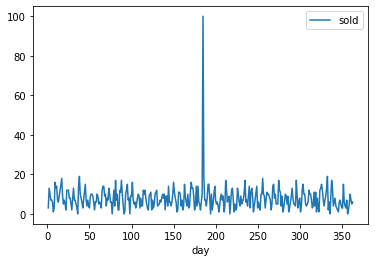

In [33]:
buckets[0].plot(x='day', y='sold')

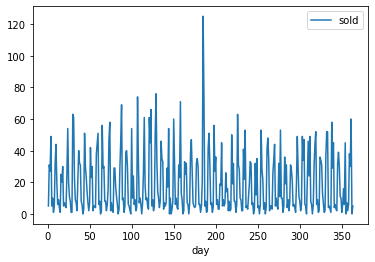

In [34]:
buckets[1].plot(x='day', y='sold')

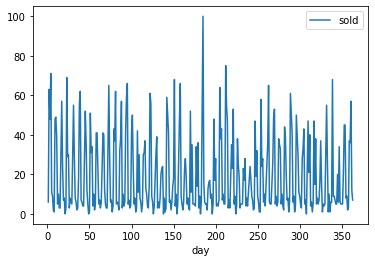

In [35]:
buckets[2].plot(x='day', y='sold')

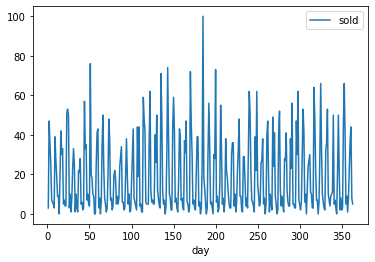

In [36]:
buckets[3].plot(x='day', y='sold')

In [42]:
first_days = buckets[3].query('day % 7 == 1')

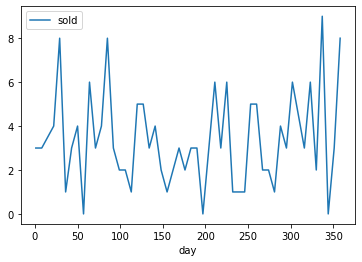

In [44]:
first_days.plot(x = 'day', y = 'sold')

In [65]:
third_days = buckets[3].query('day % 7 == 3')

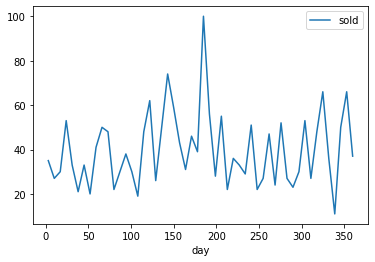

In [66]:
third_days.plot(x = 'day', y = 'sold')

In [45]:
b3_days = [buckets[3].query('day % 7 == {}'.format(i)) for i in range(7)]

In [49]:
b3_days[2].head()

,store,day,bucket,sold
7,1000,2,4,47
35,1000,9,4,39
59,1000,16,4,42
87,1000,23,4,51
113,1000,30,4,23


In [14]:
for bucket in buckets:
  bucket['weekday'] = bucket['day'] % 7

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
buckets[3]

,store,day,bucket,sold,weekday
3,1000,1,4,3,1
7,1000,2,4,47,2
11,1000,3,4,35,3
15,1000,4,4,25,4
19,1000,5,4,7,5
...,...,...,...,...,...
1396,1000,359,4,23,2
1400,1000,360,4,37,3
1404,1000,361,4,44,4
1408,1000,362,4,8,5


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


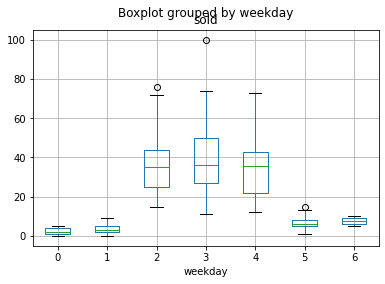

In [59]:
buckets[3].boxplot(by = 'weekday', column = 'sold')

In [16]:
for bucket in buckets:
  bucket['week'] = np.floor(bucket['day'] / 7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


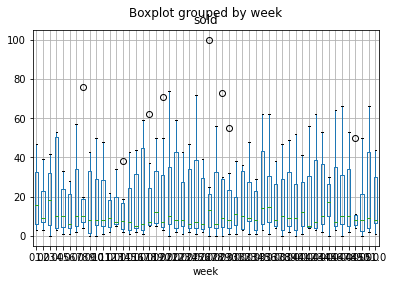

In [77]:
buckets[3].boxplot(by = 'week', column = 'sold')

In [17]:
first_store['weekday'] = first_store['day'] % 7

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


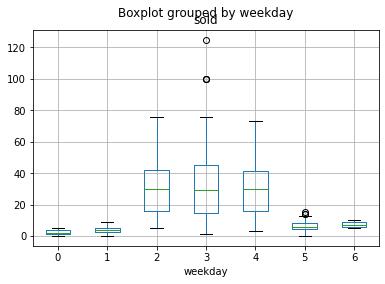

In [61]:
first_store.boxplot(by = 'weekday', column = 'sold')

In [18]:
first_store['week'] = np.floor(first_store['day'] / 7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


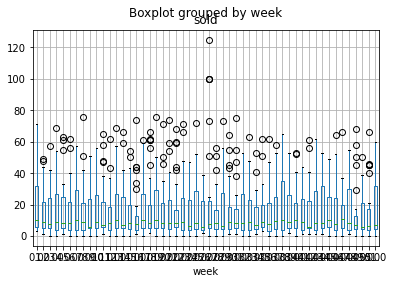

In [75]:
first_store.boxplot(by = 'week', column = 'sold')

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


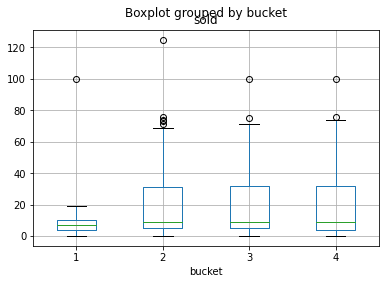

In [78]:
first_store.boxplot(by = 'bucket', column = 'sold')

In [19]:
s1b3_input = buckets[3][['week','weekday']].to_numpy()
s1b3_output = buckets[3][['sold']].to_numpy()
print(s1b3_input.shape)
print(s1b3_output.shape)

(356, 2)
(356, 1)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    s1b3_input,
    s1b3_output,
    test_size = 0.3,
    shuffle = True
)

In [110]:
import torch

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

print(X_train.shape)

torch.Size([249, 2])


In [95]:
class SalesNet(torch.nn.Module):
  def __init__(self, layer1, layer2):
    super(SalesNet, self).__init__()

    self.fc1 = torch.nn.Linear(in_features=2, out_features=layer1)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(in_features=layer1, out_features=layer2)
    self.act2 = torch.nn.Sigmoid()
    self.fc3 = torch.nn.Linear(in_features=layer2, out_features=1)
  
  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    return x

In [103]:
sales_net = SalesNet(3,3)
sales_net.forward(torch.Tensor([1., 1.]))

tensor([-0.3145], grad_fn=<AddBackward0>)

In [104]:
print(sales_net)

SalesNet(
  (fc1): Linear(in_features=2, out_features=3, bias=True)
  (act1): Sigmoid()
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (act2): Sigmoid()
  (fc3): Linear(in_features=3, out_features=1, bias=True)
)


In [106]:
loss = torch.nn.MSELoss()

optimizer = torch.optim.Adam(sales_net.parameters(), lr = 0.01)

In [107]:
x0 = X_train[0]
y0 = y_train[0]
pred = sales_net.forward(x0)
print(y0)
print(pred)

tensor([32.])
tensor([-0.2905], grad_fn=<AddBackward0>)


In [108]:
def metric(pred, target):
   return (pred - target).abs().mean()

In [109]:
batch_size = 15

for epoch in range(6000):
  order = np.random.permutation(len(X_train))

  for i in range(0, len(X_train), batch_size):
    optimizer.zero_grad()

    batch = order[i : i + batch_size]

    x_batch = X_train[batch]
    y_batch = y_train[batch]

    preds = sales_net.forward(x_batch)

    loss_value = loss(preds, y_batch)
    loss_value.backward()

    optimizer.step()

  if epoch % 100 == 0:
    test_preds = sales_net.forward(X_test)
    print(metric(test_preds, y_test))

tensor(17.7239, grad_fn=<MeanBackward0>)
tensor(12.7221, grad_fn=<MeanBackward0>)
tensor(8.9646, grad_fn=<MeanBackward0>)
tensor(7.4750, grad_fn=<MeanBackward0>)
tensor(7.0226, grad_fn=<MeanBackward0>)
tensor(7.4233, grad_fn=<MeanBackward0>)
tensor(6.8448, grad_fn=<MeanBackward0>)
tensor(6.9385, grad_fn=<MeanBackward0>)
tensor(8.3586, grad_fn=<MeanBackward0>)


KeyboardInterrupt: ignored

In [76]:
x0 = X_train[0]
y0 = y_train[0]
pred = sales_net.forward(x0)
print(y0)
print(pred)

tensor([32.])
tensor([38.2312], grad_fn=<AddBackward0>)


In [77]:
torch.save(sales_net, f = 's1b3net')

In [79]:
data.set_axis(['store', 'day', 'bucket', 'sold'], axis = 'columns', inplace = True)

In [90]:
sales = data.query('store == 1000 and bucket == 1')

In [91]:
sales.head()

,store,day,bucket,sold
0,1000,1,1,3
4,1000,2,1,13
8,1000,3,1,10
12,1000,4,1,7
16,1000,5,1,7


In [80]:
data.head()

,store,day,bucket,sold
0,1000,1,1,3
1,1000,1,2,5
2,1000,1,3,6
3,1000,1,4,3
4,1000,2,1,13


In [ ]:
for store in range(1000, 5000, 1000):
  for bucket in range(1, 5):
    print('Calculating model for store {0}, bucket {1}'.format(store, bucket))
    